In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Research data files
auto_stocks = "Stock_Data/Auto_stock_data.csv"
SP = "Stock_Data/Stock_Data.csv"
car_sales = "Car_sales_Data/Car_data.csv"
autogroup_marketshare = "Car_sales_Data/Autogroup_marketshare_est.csv"

# Read the data 
autostocks_data = pd.read_csv(auto_stocks)  # Auto stocks daily price data for 2019 and 2020
SP_data = pd.read_csv(SP)   # S&P daily price data for 2019 and 2020
car_sales_data = pd.read_csv(car_sales)  # Avg car brand sales price for grouping
AG_marketshare_data = pd.read_csv(autogroup_marketshare)  # Avg Auto Group marketshare for grouping

In [2]:
# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Co
0,1/2/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
1,1/3/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
2,1/4/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
3,1/7/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
4,1/8/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
...,...,...,...,...,...,...,...,...,...
9277,9/25/2020,173.998004,179.443004,173.271996,179.443004,173.693159,393,VOW.F,VW
9278,9/28/2020,178.111996,178.716996,173.756007,175.328993,169.710975,283,VOW.F,VW
9279,9/29/2020,177.748993,181.741996,177.265000,181.741996,175.918484,963,VOW.F,VW
9280,9/30/2020,180.531996,181.983993,180.531996,181.741996,175.918484,318,VOW.F,VW


In [3]:
# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Volume','Adj Close','Open','Close'],axis=1)

# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,High,Low,Ticker,Co
0,1/2/2019,885.599976,885.599976,AUDVF,Audi
1,1/3/2019,885.599976,885.599976,AUDVF,Audi
2,1/4/2019,885.599976,885.599976,AUDVF,Audi
3,1/7/2019,885.599976,885.599976,AUDVF,Audi
4,1/8/2019,885.599976,885.599976,AUDVF,Audi
...,...,...,...,...,...
9277,9/25/2020,179.443004,173.271996,VOW.F,VW
9278,9/28/2020,178.716996,173.756007,VOW.F,VW
9279,9/29/2020,181.741996,177.265000,VOW.F,VW
9280,9/30/2020,181.983993,180.531996,VOW.F,VW


In [4]:
# Calculate Daily Average Price from the day's High and Low price.
autostocks_data["Avg Stock Price"] = (autostocks_data["High"] + autostocks_data["Low"])/2

# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,High,Low,Ticker,Co,Avg Stock Price
0,1/2/2019,885.599976,885.599976,AUDVF,Audi,885.599976
1,1/3/2019,885.599976,885.599976,AUDVF,Audi,885.599976
2,1/4/2019,885.599976,885.599976,AUDVF,Audi,885.599976
3,1/7/2019,885.599976,885.599976,AUDVF,Audi,885.599976
4,1/8/2019,885.599976,885.599976,AUDVF,Audi,885.599976
...,...,...,...,...,...,...
9277,9/25/2020,179.443004,173.271996,VOW.F,VW,176.357500
9278,9/28/2020,178.716996,173.756007,VOW.F,VW,176.236502
9279,9/29/2020,181.741996,177.265000,VOW.F,VW,179.503498
9280,9/30/2020,181.983993,180.531996,VOW.F,VW,181.257995


In [5]:
# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Low','High'],axis=1)

# Re-order Columns
autostocks_data = autostocks_data[['Date', 'Co','Ticker','Avg Stock Price']]

# Rename column- required for data merge later
autostocks_data = autostocks_data.rename(columns={'Co': 'Auto Group'})

# Remove S&P data beyond the end of the 3Q 2020
autostocks_data['Date'] = pd.to_datetime(autostocks_data['Date'])

autostocks_data = autostocks_data[autostocks_data['Date'] <= '10/1/2020']

# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price
0,2019-01-02,Audi,AUDVF,885.599976
1,2019-01-03,Audi,AUDVF,885.599976
2,2019-01-04,Audi,AUDVF,885.599976
3,2019-01-07,Audi,AUDVF,885.599976
4,2019-01-08,Audi,AUDVF,885.599976
...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500
9278,2020-09-28,VW,VOW.F,176.236502
9279,2020-09-29,VW,VOW.F,179.503498
9280,2020-09-30,VW,VOW.F,181.257995


In [6]:
# Checking the number of unique auto stock tickers in the clean DataFrame.
unique = autostocks_data["Auto Group"].unique()
count = len(unique)
print("No. of auto stocks:",count)
print(unique)


No. of auto stocks: 21
['Audi' 'BMW' 'Daimler' 'Ferrari' 'Fiat Chrysler' 'Ford' 'GM' 'Honda'
 'Hyundai' 'Kia' 'Mazda' 'McLaren' 'Mitsubishi' 'Nissan' 'Porsche'
 'Subaru' 'TaTa' 'Tesla' 'Toyota' 'Volvo' 'VW']


In [7]:
car_sales_data = car_sales_data.drop(['Q1 2019','Q2 2019','Q3 2019','Q4 2019','Q1 2020','Q2 2020','Q3 2020','Q4 2020'],axis=1)

# Rename column- required for data merge later
car_sales_data = car_sales_data.rename(columns={'Autogroup': 'Auto Group','Avg Price':'Avg Car Price'})

# Remove Ultra luxury brands that are part of larger auto groups to prevent significant skewing of avg car price of group
car_sales_data = car_sales_data.sort_values("Auto Group", ascending = False)
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bugatti']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Lamborghini']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bentley']

car_sales_data

,Brand,Auto Group,Avg Car Price
39,Volvo,Volvo,50000
38,Volkswagen,VW,30000
24,Lexus,Toyota,56000
37,Toyota,Toyota,34000
36,Tesla,Tesla,60000
19,Jaguar,TaTa,52000
23,Land Rover,TaTa,59000
35,Subaru,Subaru,31000
33,Porsche,Porsche,73000
32,Nissan,Nissan,30000


In [8]:
# Calculations
autogroup_sales_data = car_sales_data.groupby(['Auto Group']).mean().round(2)

print("No. of autogroups:", len(autogroup_sales_data))
autogroup_sales_data

No. of autogroups: 21


,Avg Car Price
Auto Group,
Audi,59017.00
BMW,48500.00
Daimler,58000.00
Ferrari,300000.00
Fiat Chrysler,40142.86
Ford,42000.00
GM,38750.00
Honda,34000.00
Hyundai,39500.00


In [9]:
merged_autostocks_data = autostocks_data.merge(autogroup_sales_data, on='Auto Group')

merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price
0,2019-01-02,Audi,AUDVF,885.599976,59017.0
1,2019-01-03,Audi,AUDVF,885.599976,59017.0
2,2019-01-04,Audi,AUDVF,885.599976,59017.0
3,2019-01-07,Audi,AUDVF,885.599976,59017.0
4,2019-01-08,Audi,AUDVF,885.599976,59017.0
...,...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500,30000.0
9278,2020-09-28,VW,VOW.F,176.236502,30000.0
9279,2020-09-29,VW,VOW.F,179.503498,30000.0
9280,2020-09-30,VW,VOW.F,181.257995,30000.0


In [10]:
merged_autostocks_data = merged_autostocks_data.merge(AG_marketshare_data, on='Auto Group')

merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price,Segment Market Share
0,2019-01-02,Audi,AUDVF,885.599976,59017.0,0.1120
1,2019-01-03,Audi,AUDVF,885.599976,59017.0,0.1120
2,2019-01-04,Audi,AUDVF,885.599976,59017.0,0.1120
3,2019-01-07,Audi,AUDVF,885.599976,59017.0,0.1120
4,2019-01-08,Audi,AUDVF,885.599976,59017.0,0.1120
...,...,...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500,30000.0,0.1126
9278,2020-09-28,VW,VOW.F,176.236502,30000.0,0.1126
9279,2020-09-29,VW,VOW.F,179.503498,30000.0,0.1126
9280,2020-09-30,VW,VOW.F,181.257995,30000.0,0.1126


In [11]:
# Create new columns for Segment

# Create a list of our segments
segments = [
    (merged_autostocks_data['Avg Car Price'] <= 30000),
    (merged_autostocks_data['Avg Car Price'] > 30000) & (merged_autostocks_data['Avg Car Price'] <= 45000),
    (merged_autostocks_data['Avg Car Price'] > 45000) & (merged_autostocks_data['Avg Car Price'] <= 70000),
    (merged_autostocks_data['Avg Car Price'] > 70000)
    ]

# Create a list of the values we want to assign for each segment.
values = ['Economy', 'Mid-Range', 'Luxury', 'Ultra Luxury']

# Create a new column and use np.select to assign values to it using our lists as arguments
merged_autostocks_data["Segment"] = np.select(segments, values)

# Display updated DataFrame
merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price,Segment Market Share,Segment
0,2019-01-02,Audi,AUDVF,885.599976,59017.0,0.1120,Luxury
1,2019-01-03,Audi,AUDVF,885.599976,59017.0,0.1120,Luxury
2,2019-01-04,Audi,AUDVF,885.599976,59017.0,0.1120,Luxury
3,2019-01-07,Audi,AUDVF,885.599976,59017.0,0.1120,Luxury
4,2019-01-08,Audi,AUDVF,885.599976,59017.0,0.1120,Luxury
...,...,...,...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500,30000.0,0.1126,Economy
9278,2020-09-28,VW,VOW.F,176.236502,30000.0,0.1126,Economy
9279,2020-09-29,VW,VOW.F,179.503498,30000.0,0.1126,Economy
9280,2020-09-30,VW,VOW.F,181.257995,30000.0,0.1126,Economy


In [12]:
# Create weighted average component of each segment by each Auto Group to create Segment Price Index
merged_autostocks_data["Stock WtAvg"] = merged_autostocks_data["Avg Stock Price"] * merged_autostocks_data["Segment Market Share"]

# Delete unnecessary columns
merged_autostocks_data = merged_autostocks_data.drop(['Avg Car Price','Segment Market Share','Auto Group','Ticker','Avg Stock Price'],axis=1)

merged_autostocks_data

,Date,Segment,Stock WtAvg
0,2019-01-02,Luxury,99.187197
1,2019-01-03,Luxury,99.187197
2,2019-01-04,Luxury,99.187197
3,2019-01-07,Luxury,99.187197
4,2019-01-08,Luxury,99.187197
...,...,...,...
9277,2020-09-25,Economy,19.857855
9278,2020-09-28,Economy,19.844230
9279,2020-09-29,Economy,20.212094
9280,2020-09-30,Economy,20.409650


In [13]:
# Group by Market Segment
Economy = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Economy"), :]
Econ = Economy['Stock WtAvg'].to_numpy()

MidRange = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Mid-Range"), :]
Mid = MidRange['Stock WtAvg'].to_numpy()

Luxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Luxury"), :]
Lux = Luxury['Stock WtAvg'].to_numpy()

UltraLuxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Ultra Luxury"), :]
Ultra = UltraLuxury['Stock WtAvg'].to_numpy()

AG_arrays = [Econ, Mid, Lux, Ultra]  #Create list of arrays

In [14]:
#Preview Economy
Economy

,Date,Segment,Stock WtAvg
3978,2019-01-02,Economy,19.488489
3979,2019-01-03,Economy,19.178210
3980,2019-01-04,Economy,20.064722
3981,2019-01-07,Economy,20.448877
3982,2019-01-08,Economy,20.227249
...,...,...,...
9277,2020-09-25,Economy,19.857855
9278,2020-09-28,Economy,19.844230
9279,2020-09-29,Economy,20.212094
9280,2020-09-30,Economy,20.409650


In [15]:
# Group by Date to create index by segment stock price
EconIndex = Economy.groupby(['Date']).sum()
EconIndex = EconIndex.reset_index()

MidRngIndex = MidRange.groupby(['Date']).sum()
MidRngIndex = MidRngIndex.reset_index()

LuxIndex = Luxury.groupby(['Date']).sum()
LuxIndex = LuxIndex.reset_index()

UltraLuxIndex = UltraLuxury.groupby(['Date']).sum()
UltraLuxIndex = UltraLuxIndex.reset_index()


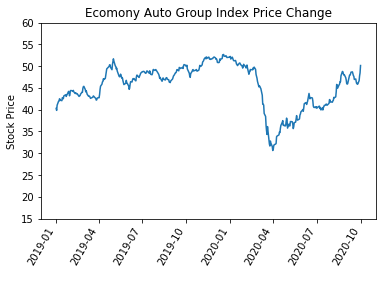

In [16]:
#Economy Auto Group Index Stock Price Change
minvalue = EconIndex.loc[EconIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = EconIndex.loc[EconIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
EconIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Ecomony Auto Group Index Price Change");

# Sets the y limits
plt.ylim(15, 60)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Stock Price")

# Save the figure as .png
plt.savefig('Images/Economy AG Index Stock Price Change.png')

plt.show(block=True)

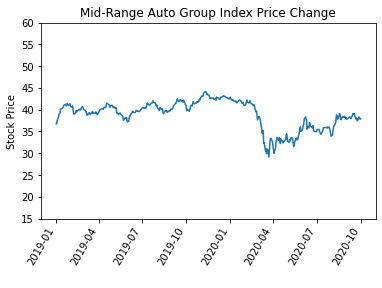

In [17]:
#Mid-Range Auto Group Index Stock Price Change
minvalue = MidRngIndex.loc[MidRngIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = MidRngIndex.loc[MidRngIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
MidRngIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Mid-Range Auto Group Index Price Change");

# Sets the y limits
plt.ylim(15, 60)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Stock Price")

# Save the figure as .png
plt.savefig('Images/MidRange AG Index Stock Price Change.png')

plt.show(block=True)

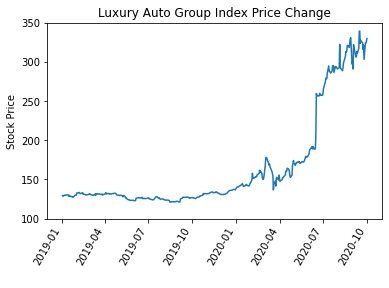

In [23]:
#Luxury Auto Group Index Stock Price Change
minvalue = LuxIndex.loc[LuxIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = LuxIndex.loc[LuxIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
LuxIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Luxury Auto Group Index Price Change");

# Sets the y limits
plt.ylim(100, 350)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Stock Price")

# Save the figure as .png
plt.savefig('Images/Luxury AG Index Stock Price Change.png')

plt.show(block=True)

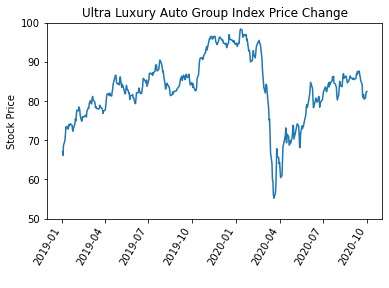

In [25]:
#Ultra Luxury Auto Group Index Stock Price Change
minvalue = UltraLuxIndex.loc[UltraLuxIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = UltraLuxIndex.loc[UltraLuxIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
UltraLuxIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Ultra Luxury Auto Group Index Price Change");

# Sets the y limits
plt.ylim(50, 100)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Stock Price")

# Save the figure as .png
plt.savefig('Images/UltraLuxury AG Index Stock Price Change.png')

plt.show(block=True)